# 1. Bootstrap Estimation
We previously looked at the bias-variance tradeoff and if you were thinking critically you may have wondered: "Could it be possible in some way to lower bias and variance simultaneously?"

In this section, we are going to take our first look into **model averaging**. The key tool that we need to do this is called **bootstrapping**, aka **resampling**. The fascinating result of this is that even though we are using the same data, we can get a better result. This should seem odd at first, since if we create a model from a set of samples, how can that be any different than taking the averages of different models trained on different subsets of those same samples again and again-it is the same set of samples after all. 

However, model averaging does work, even if it is true that they work on the same data that you would have if you only have 1 model. Before we talk about bootstraping for models, we are going to look at bootstrapping for simple parameter estimates like the mean. 

## 1.1 Bootstrap Estimation - Mean
So, how does bootstrap estimation work? We are given a set of data points from $1...N$
#### $$X = x_1,x_2,...,x_N$$
We then draw a sample, with replacement, from this data set, $B$ times. For each of the $b$ subsample datasets, we calculate the parameter of interest-aka the mean, variance, or any other statistic. Once the loop is done we will have $B$ different estimates of the parameter. We can use this to find the mean of the parameter, and the variance of the parameter. Why do we care about the mean and variance? First, the mean tells us the most likely value of the parameter, in other words the expected value of the parameter. The variance then can tell us how accurate that estimate is! A **large variance** means not that accurate, and a **small variance** means more accurate. So, in pseudo code the algorithm could look like this:

```
X = x1, x2,...xN
for b = 1..B:
    Xb = sample_with_replacement(X)         # size of Xb is N
    sample_mean[b] = sum(Xb)/N
Calculate mean and variance of {sample_mean[1],...,sample_mean[B]}
```

As an example, lets just say that $X$ has a size N = 5 with the following values: 
#### $$X = 1,2,3,4,5$$

Let's say that we decide to make $B = 4$, in order words we are going to have 4 iterations of sampling. The first time we sample (with replacement) we may end up with:

#### $$X_{b1} = 1,2,5,5,2$$
We have sampled five values from our original $X$. If we perform that 3 more times, we may end up with:
#### $$X_{b2} = 4,3,3,1,5$$
#### $$X_{b3} = 2,4,1,5,4$$
#### $$X_{b4} = 3,1,3,2,4$$

Now, let's say that our original goal was to be finding a certain parameter of $X$, in this case the mean. We can then calculate the mean of each of above samples:
#### $$\mu_{B1} = \frac{15}{5} = 3$$
#### $$\mu_{B2} = \frac{16}{5} = 3.2$$
#### $$\mu_{B3} = \frac{16}{5} = 3.2$$
#### $$\mu_{B4} = \frac{13}{5} = 2.6$$

We now have $B$ different estimates of the mean of our samples, which were taken from $X$. What we may want to do is now try and find the **mean** of these means. In other words, we can try and find the parameters that describe this set of sampled data:

#### $$mean(\mu_{B1},\mu_{B2},\mu_{B3},\mu_{B4}) = \frac{\mu_{B1} + \mu_{B2}+\mu_{B3}+\mu_{B4}}{B}$$

And the variance which can tell us how accurate our estimate is:
#### $$var(\mu_{B1},\mu_{B2},\mu_{B3},\mu_{B4})$$

---
<br>
## 1.2 Sampling with Replacement
In case you have not come across sampling with replacement, let's quickly touch on it now. Suppose we have a dataset with the points 1,2,3,4,5.

#### $$X = 1,2,3,4,5$$

Suppose we then draw a sample and get 5. Sampling with replacements means that if we draw another sample, we can get 5 again. In fact, we could draw a sample with all 5s! 

#### $$sample = 5,5,5,5,5$$

This is because we replace the sample after we take it from the dataset. This is the opposite of sampling without replacement. If we were to sample without replacement and we drew a number of samples equal to the dataset size, we would just draw the dataset itself. Hence, sampling with replacement is important to this process. 

---
<br>
## 1.3 Why does bootstrapping work?
As you can see, bootstrapping is a very simple algorithm- you are just computing the parameter estimate multiple times from the same dataset. So, why does it work? Lets look at the results first and then we can derive them. Remember, we are interested in the mean and variance. 

<br>
**Mean**<br>
The mean of the bootstrap estimate is equal to the parameter itself:

#### $$E(\bar{\theta_B}) = mean(\bar{\theta_B}) = \theta$$

And, as an example, if our parameter had been the mean, then what we find is that mean of our bootstrap estimate of $\mu$, is equal to the actual value of $\mu$. In other words, the mean of our bootstrap sampled means, is the actual mean of the original data.

#### $$E(\bar{\mu_B}) = \mu$$

Or in the case of our example earlier:
#### $$E(\frac{\mu_{B1}+\mu_{B2}+\mu_{B3}+\mu_{B4}}{B}) = \mu_X$$
 
**Variance**<br>
The variance is a bit more complicated. Let's suppose the correlation coefficient between two different estimates of the parameter, $\hat{\theta}_i, \hat{\theta}_j$ is $\rho$, and the variance of each $\hat{\theta}$ is $\sigma^2$:

#### $$\rho = corr(\hat{\theta}_i, \hat{\theta}_j), var(\hat{\theta}) = \sigma^2$$

Then, it can be derived that the variance of the bootstrap estimate is:

#### $$var(\bar{\theta}_B) = \frac{1 - \rho}{B}\sigma^2 + \rho \sigma^2$$

Notice that if each bootstrap estimate is completely uncorrelated from the others, the variance would be the original variance divided by $B$. This means that for every bootstrap sample we take, we reduce the variance of our estimate. That is remarkable! Unfortunately, there will probably be correlation. 

---

<br>
## 1.4 Confidence Interval
One application of bootstrap estimation, is that we can also estimate the confidence interval of our estimate. We assume a gaussian approximation, so let's say we want a 95% confidence interval. That means that we want the lower and upper bound of $\theta$ that covers 95% of the area under the probability distribution. This is approximately equal to the sample mean of the bootstrap $\theta$, plus or minus 1.96 times the standard deviation of the bootstrap $\theta$:

#### $$95\% CI \approx \bar{\theta}_B \;\pm\; 1.96 std(\hat{\theta}_B)$$

---
<br>
## 1.5 Derivation of Mean and Variance 
Now that we know the main results of bootstrap estimation, how do we show that they are true?

<br>
### 1.5.1 Mean Derivation
<br>
Let's start with the mean. We want to be able to show that the mean value of our bootstrap estimated parameter is the value of the parameter itself. In other words, think back to our simple example at the start of lecture. Our data set was $X$, and the parameter we were looking at was $\mu$, the mean of $X$. We want to be able to prove that after performing our bootstrap sampling, and that expected value of the mean of our samples (think $\mu_{B1}$, $\mu_{b2}$, and so on) are equal to actual mean of $X$, since this was the parameter we were originally trying to estimate! 

So, we know that expected value (based on its definiton: *expected value of a random variable, intuitively, is the long-run average value of repetitions of the experiment it represents*), is equivalent to the mean. Let's define the following: 
> * $\bar{\theta}_B$ = sample mean of resampled sample means
* $\hat{\theta}_i$ = sample mean of bootstrap sample $i$
* $\theta$ = original parameter we're trying to estimate

Okay, now we can start with looking at the expected value of our resampled sample means:

#### $$E(\bar{\theta}_B)$$

We can expand $\bar{\theta}_B$ based on its definition:

#### $$E(\bar{\theta}_B) = E \Big[ \frac{1}{B} \sum_{i=1}^B \hat{\theta}_i \Big] = E\Big[\frac{1}{B}(\hat{\theta}_1 + ...+\hat{\theta}_B)\Big]$$

Because $\frac{1}{B}$ is a constant, and the expected value of constant is just itself, we can pull it out:

#### $$E(\bar{\theta}_B) = \frac{1}{B}*E\Big[(\hat{\theta}_1 + ...+\hat{\theta}_B)\Big]$$

And then we know the expected value of any $\hat{\theta}_i$ is going to be $\theta$, the actual parameter. We also know that there are $B$ total $\hat{\theta}$s, so we can pull that out and end up with the final equation:

#### $$E(\bar{\theta}_B) =  \frac{1}{B}BE(\hat{\theta}) = \theta$$



We can see that the expected value of the bootstrap estimate of the parameter, is equal to the parameter, which is exactly what we were looking for. 

<br>
### 1.5.2 Variance Derivation
<br>
<br>
### 1.5.2.1 Variance Derivation - Definitions
Next, let's look at the variance. We can start with some definitions. Let's suppose that the expected value of $\hat{\theta}$ (aka the expected value of the parameter that we calculate after resampling) is equal to $\mu$. 

#### $$E(\hat{\theta}) = \mu$$

This is not necessarily equal to the original mean of data $X$. It is the mean of whatever parameter we are trying to estimate. For instance, say that the parameter we are trying to estimate is the mean (as in our simple example from earlier). We are stating that the expected value of any of the means we have sampled ($\mu_{B1},\mu_{B2}$, etc) is just equal to $\mu$. So in this case $\mu_{B1}$ and so on would be represented as $\hat{\theta}$ (the parameter we are trying to find, and $\mu$ is the mean/expected value of that parameter. 

Let's also define the variance of $\hat{\theta}$ to be $\sigma^2$:

#### $$var(\hat{\theta}) = E \Big[(\hat{\theta} - \mu)^2\Big] = \sigma^2$$

We can next define the correlation between two different $\hat{\theta}$s to be $\rho$:
#### $$\rho = \frac{E \Big[(\hat{\theta}_i - \mu)(\hat{\theta}_j - \mu) \Big]}{\sigma^2}$$

Note that correlation is scaled by standard deviation, so it always $[-1, 1]$. We then define the sum of all $\hat{\theta}$ to be $S_B$:
#### $$S_B = \sum_{i=1}^B \hat{\theta}_i$$

And therefore the sample mean of the bootstrap estimates is:

#### $$\bar{\theta}_B = \frac{1}{B}S_B$$

<br>
### 1.5.2.2 Variance Derivation - Write out definition
Let's start by writing out the definiton for variance of $\bar{\theta}_B$:

#### $$var(\bar{\theta}_B) = E \Big[(\bar{\theta}_B - \mu)^2\Big]= E \Big[(\frac{1}{B}S_B - \mu)^2\Big]$$

Then we can perform several algebraic operations to the right side of the equation:
#### $$E \Big[(\frac{1}{B}S_B - \frac{1}{B} B\mu)^2\Big]$$
#### $$E \Big[\Big((\frac{1}{B})(S_B - B\mu)\Big)^2\Big]$$
#### $$E \Big[\frac{1}{B^2}(S_B - \mu)^2\Big]$$
#### $$\frac{1}{B^2}E \Big[(S_B - \mu)^2\Big]$$
#### $$\frac{1}{B^2}E \Big[S_B^2 - 2\mu BS_B + \mu^2 B^2\Big]$$

Now, if we look specifically at the term $- 2\mu BS_B$, we can see that 2, $\mu$, and $B$ are constant, so we can pull them outside of the expected value:

#### $$E\Big[-2 \mu B S_B\Big] = -2 \mu B *E\Big[S_B\Big] $$

We know that the expected value of $S_B$, based on its definition, can be rewritten as:

#### $$-2 \mu B *E\Big[S_B\Big] = -2 \mu B *E\Big[B\hat{\theta}\Big] $$

And since $B$ is constant, it can be pulled outside of the expected value, and we have defined the expected value of $\hat{\theta}$ to be $\mu$:

#### $$-2 \mu B^2 *E\Big[\hat{\theta}\Big] = -2 \mu^2 B^2 $$

Now, back to the equation we branched off from: 

#### $$\frac{1}{B^2}E \Big[S_B^2 - 2\mu BS_B + \mu^2 B^2\Big]$$

We can replace the middle term with that which we just found above, and end up with: 

#### $$var(\bar{\theta}_B) = \frac{1}{B^2}E \Big[S_B^2 - \mu^2 B^2\Big]$$

At this point, we can note that $\mu$ and $B$ are **both constant**, so they can be pulled out of the expected value: 

#### $$var(\bar{\theta}_B) = \frac{1}{B^2}\Big(E \Big[S_B^2\Big]  - \mu^2 B^2\Big)$$

Which if we then multiply the fraction through, we end up with: 

#### $$var(\bar{\theta}_B) = \frac{1}{B^2}E \Big[S_B^2\Big]  - \mu^2$$

Our main focus now is to find $E\Big[S_B^2\Big]$.
<br>
### 1.5.2.3 Variance Derivation - Find $E\Big[S_B^2\Big]$
We can start by using the definition of $S_B$, which is just the sum of the individual sample $\hat{\theta}$s:

#### $$E\Big[S_B^2\Big] = E\Big[(\hat{\theta}_1+\hat{\theta}_2+...+\hat{\theta}_B)(\hat{\theta}_1+\hat{\theta}_2+...+\hat{\theta}_B)\Big]$$

The important point to notice here is that we will end up with two types of terms here when we multiply this out. There will be the type where it is $\hat{\theta}_i*\hat{\theta}_i$ (aka the subscript is the same for both $\hat{\theta}$s in the expected value, it will look like $(\hat{\theta}_1*\hat{\theta}_1 +\hat{\theta}_2*\hat{\theta}_2)$ and so on). There will be $B$ of these terms. 

The other type of term that we will get is $\hat{\theta}_i*\hat{\theta}_j$, where $i \neq j$. Since there will be $B^2$ terms in total, and there will be $B$ where $i = j$, then there will be $B(B-1)$ terms where $i \neq j$. Both of these terms will be non zero.

#### $$E\Big[S_B^2\Big] = BE\Big[\hat{\theta}_i^2\Big] + B(B-1)E_{i \neq j}\Big[\hat{\theta}_i\hat{\theta}_j\Big]$$

We can find these two expected values using our previous definitions! 

### 1.5.2.3 Variance Derivation - Rearange equation for Variance and Correlation
If we rearange our equation for the variance and correlation of $\hat{\theta}$, we can find these two expected values. We can start with the variance and begin looking for $E\Big[\hat{\theta}_i^2\Big]$:

#### $$var(\hat{\theta}_i) = \sigma^2 = E\Big[ (\hat{\theta}_i - \mu)^2 \Big]$$ 

And we can expand out the inside: 

#### $$E\Big[ (\hat{\theta}_i - \mu)^2 \Big] = E\Big[ (\hat{\theta}_i^2 - 2\mu \hat{\theta}_i+ \mu^2) \Big]$$ 

Take the expected value of each term:

#### $$E\Big[\hat{\theta}_i^2\Big] - E\Big[ 2\mu \hat{\theta}_i \Big] + \mu^2 $$ 

Focusing on the middle term (as we did earlier), we can see that the 2 and $\mu$ just have an expected value of themselves, so they can be pulled out:

#### $$E\Big[\hat{\theta}_i^2\Big] -  2\mu E\Big[\hat{\theta}_i \Big] + \mu^2 $$ 

And the expected value of $\hat{\theta}_i$ is just $\mu$ (by definition!). So we end up with: 

#### $$\sigma^2 = E\Big[\hat{\theta}_i^2\Big] - \mu^2 $$ 
#### $$E\Big[\hat{\theta}_i^2\Big] = \sigma^2 + \mu^2 $$ 

Great! Now we can look at $\rho$ and begin solving for $E_{i \neq j}\Big[\hat{\theta}_i\hat{\theta}_j\Big]$. Let's start with the definition of $\rho$:

#### $$\rho = \frac{E \Big[(\hat{\theta}_i - \mu)(\hat{\theta}_j - \mu) \Big]}{\sigma^2}$$

We can expand the top:

#### $$\rho = \frac{E \Big[(\hat{\theta}_i\hat{\theta}_j - \mu \hat{\theta}_i - \mu \hat{\theta}_j  +\mu^2) \Big]}{\sigma^2}$$

And again if we look at the middle terms, we can simplify them by taking out the $\mu$, and knowing the the expected value of $\hat{\theta}$ is just $\mu$. This allows us to simplify our equation to:

#### $$\rho = \frac{E \Big[\hat{\theta}_i\hat{\theta}_j\Big] - \mu^2}{\sigma^2}$$

And we can rearange that to find: 

#### $$E \Big[\hat{\theta}_i\hat{\theta}_j\Big] = \rho\sigma^2 + \mu^2$$

### 1.5.2.4 Variance Derivation - Plug in values to find $E\Big[S_B^2\Big]$
Now if we go back to the equation we branched off from: 

#### $$E\Big[S_B^2\Big] = BE\Big[\hat{\theta}_i^2\Big] + B(B-1)E_{i \neq j}\Big[\hat{\theta}_i\hat{\theta}_j\Big]$$

We can being solving for $E\Big[S_B^2\Big]$. So let's plug in our recently determined expected values:

#### $$ E\Big[S_B^2\Big] = \sigma^2 + \mu^2 + B(B-1)(\rho\sigma^2 + \mu^2)$$

And then we can simplify to:

#### $$ E\Big[S_B^2\Big] = B \sigma^2  + B(B-1)\rho\sigma^2 + \mu^2B^2$$

Great, now we have our value for $E\Big[S_B^2\Big]$! Let's now return to the equation for variance that we had branched off from:

#### $$var(\bar{\theta}_B) = \frac{1}{B^2}E \Big[S_B^2\Big]  - \mu^2$$

And plug in the expected value of $S_B$ we just solved for:

#### $$var(\bar{\theta}_B) = \frac{1}{B^2} \Big[B \sigma^2  + B(B-1)\rho\sigma^2 + \mu^2B^2 \Big]  - \mu^2$$

And finally let's simplify the above equation:

#### $$ \Big[\frac{1}{B} \sigma^2  + \frac{(B-1)}{B}\rho\sigma^2 + \mu^2\Big]  - \mu^2$$

#### $$ \frac{\sigma^2}{B}   + \frac{(B-1)}{B}\rho\sigma^2 $$

#### $$ \frac{\sigma^2}{B}   + \frac{B\rho\sigma^2}{B} - \frac{\rho\sigma^2}{B} $$

#### $$ \frac{\sigma^2- \rho \sigma^2}{B}  + \rho \sigma^2$$

#### $$var(\bar{\theta}_B) = \frac{1- \rho}{B}\sigma^2  + \rho \sigma^2$$

We have arrived at the final solution for variance of $\bar{\theta}_B$!

<br>
### 1.5.3 Variance Analysis
One interesting question to ask now that we have arrived at the solution for variance, is what will the variance of the bootstrap estimate be, if the correlation is maximum (recalling that the maximum correlation coefficient, $\rho$, is 1, meaning that the 2 variables are perfectly correlated with eachother)? Well, if $\rho$ is 1 then we see that the $\frac{1}{B}$ term goes away and we are just left with $\sigma^2$. This makes sense, because if each individual estimate is correlated with eachother, then the variance of the bootstrap estimate will not go down at all. However, if $\rho$ is 0, then we can get the best possible decrease in variance, which is $\frac{1}{B}$.

It is import to note that using the bootstrap estimate of the mean, or using bootstrap for any linear model, does not greatly improve the variance of the model. For linear statistics, for which the sample mean is an example:

#### $$\rho = \frac{N}{2N - 1} \approx 0.5$$ 

The biggest advantage of bootstrapping occurs when you use highly nonlinear models like **decision trees**. On different data sets they will produce highly irregular decision boundaries that will **not correlate** with each other that much, so $\rho$ will be small. In other words, we will reduce the variance more by combing non linear models that are less likely to be correlated!  

---

<br>
# 2. Bootstrap Demo in Code
We are now going to demonstrate bootstrapping in order to estimate the confidence interval of the sample mean, in order to show that it is approximately equal to the traditional method of estimating the confidence interval. 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

In [27]:
B = 200                        # B is the number of times we are going to sample 
N = 20                         # N = number of data points
X = np.random.randn(N)         # X is a standard normal distribution with N points

Note that the `numpy.random.randn` function creates a **univariate/normal distribution**, hence we are looking for a $\mu$ of 0, and a variance, $\sigma^2$ of 1. This can be seen here in the docs: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html

In [28]:
print("Sample mean of X: ", X.mean())       # This is the regular sample mean 

individual_estimates = np.empty(B)          # Create array to hold estimates

# Sample from X (with replacement) B times
for b in range(B):
    sample = np.random.choice(X, size=N)    # draw a random sample from X of size N = 20
    individual_estimates[b] = sample.mean()   # save the sample mean
    

# Calculate bootstrap estimate of the mean & STD
bmean = individual_estimates.mean()                # Mean of all individual estimates
bstd = individual_estimates.std()                  # Standard Deviation of all individual est

Sample mean of X:  -0.024772403983535068


Now we can calculate the confidence interval! Remember, the confidence interval is used in finding the range of values that are most likely to contain the true mean, $\mu$. It can visualized as:

<img src="images/confidence-interval.jpeg">

In [33]:
"""Find lower and upper bound of 95% confidence interval for estimate of mean of X"""
lower = bmean + norm.ppf(0.025) * bstd        # norm.ppf(0.025) == -1.96
upper = bmean + norm.ppf(0.975) * bstd        # norm.ppf(0.975) == +1.96

print("Bootstrap mean of X: ", bmean)

Bootstrap mean of X:  0.24798847477661737


And let's find the confidence interval the traditional way:

In [34]:
# Traditional way of calculating CI
lower2 = X.mean() + norm.ppf(0.025) * X.std() / np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975) * X.std() / np.sqrt(N)

Now we are going to want to plot this.

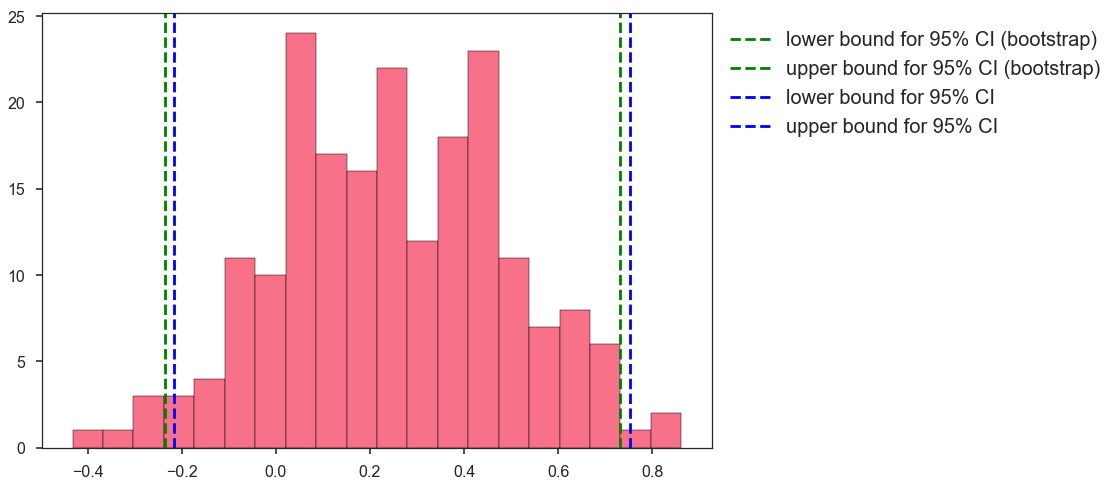

In [41]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(individual_estimates, bins=20, ec="black")
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='b', label="lower bound for 95% CI")
plt.axvline(x=upper2, linestyle='--', color='b', label="upper bound for 95% CI")
plt.legend(fontsize=20, bbox_to_anchor=(1, 1), loc=2)
plt.show()